## **5.4 Google Colab algoritmos de mejoramiento de imágenes en el dominio de Fourier**

Los ejercicios que deben agregarse a este proyecto serán las siguientes:

1.   Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian).

2.   Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian).













# **Names and IDs of team members:**

**Nombre Matrícula**

Félix Daniel Reyes López A01794458

Dante Cesar Cervantes Gutierrez A01794585

Ruben Guerrero del Fierro A01793005

Juan Manuel Carballo Montaño A01166758

# **Importing Libraries**

In [ ]:
import math
import cv2
import cv2 as cv
import numpy as np
import pandas as pd
from math import sqrt,exp

from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# **Loading images from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/ComputerVision/Activities/5.4"
os.chdir(DIR)

# **Actividad 1. Fourier filtro pasabajas**

## Aplicación:
En la mayoría de los casos, se deben de aplicar filtros de basa bandas, esto es la aplicación de los filtros pasa bajas y pasa altas. Esto es porque el pasa altas conservara los detalles del borde y el filtro pasa bajas eliminara el ruido de la imagen al preservar la los detalles.[10]

Las aplicaciones donde encontramos la utilización de filtros de Fourier son:

**Detección de Grietas es paredes de los túneles**

**Image-Range Stitching and Semantic-Based Crack Detection Methods for Tunnel Inspection Vehicles**

Se utiliza un automóvil especialmente diseñado con un conjunto de cámaras e iluminación necesaria, así como sensores láseres entre otros para realizar un escaneo de las paredes y techo del túnel:


<img src="https://drive.google.com/uc?export=view&id=12rOozVKp8p3Pkb4Cdm7_ZNKzjE-0oRw4" width="600"/>

<img src="https://drive.google.com/uc?export=view&id=1bZ3d0KWBZkV0epS0mGZga5bQox4RpPF5" width="600"/>

"La tarea de detección de grietas se reformuló como un problema de separación semántica. El objetivo era segmentar cada componente semántico en distintos contenedores semánticos (Figura 6d-f). Este enfoque funciona como un filtro inteligente, superior a cualquier otra técnica de etiquetado. Mientras que los filtros de Fourier separan las imágenes en componentes de alta y baja frecuencia, este método separa las imágenes en componentes de grietas y componentes de textura (Figura 7)."[11]

<img src="https://drive.google.com/uc?export=view&id=1_VZxL2P7o9r-30ozQiQ6kkQBYRSNYACv" width="350"/>


Existen mas aplicaciones donde se utiliza un pasabandas, como por ejemplo:

**Procesamiento de imágenes de radiografías de uniones soldadas de tubo a placa de tubos para mejorar la detectabilidad de defectos**
Tian, L., Li, Q., He, L., & Zhang, D. (2023). Image-Range Stitching and Semantic-Based Crack Detection Methods for Tunnel Inspection Vehicles. Remote Sensing, 15(21), 5158. https://0-doi-org.biblioteca-ils.tec.mx/10.3390/rs15215158

**Detección de arrugas cutáneas y cuantificación de rugosidades mediante una novedosa técnica de procesamiento de imágenes desde un dispositivo dermatoscópico**
Carlos da Silva, G., Barbosa, M. B., Júnior, F. B. C., Moreira, P. L., Werka, R., & Martin, A. A. (2023). Detection of skin wrinkles and quantification of roughness using a novel image processing technique from a dermatoscope device. Skin Research & Technology, 29(6), 1–8. https://0-doi-org.biblioteca-ils.tec.mx/10.1111/srt.13335


**Efecto del tamaño de las partículas de Cu en la formación de interfaces en catalizadores de Cu/ZnO para la síntesis de metanol**
Zhao, L., Zhang, L., Wu, Z., Huang, C., Chen, K., Wang, H., & Yang, F. (2023). Size Effect of Cu Particles on Interface Formation in Cu/ZnO Catalysts for Methanol Synthesis. Catalysts (2073-4344), 13(8), 1190. https://0-doi-org.biblioteca-ils.tec.mx/10.3390/catal13081190

## Ideal - Low Pass Filter



In [ ]:
# Ideal Ruben
img = cv.imread('Images/transmission.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

In [ ]:
rows,cols = img.shape
nrows = cv.getOptimalDFTSize(rows)
ncols = cv.getOptimalDFTSize(cols)
nimg = np.zeros((nrows,ncols))
nimg[:rows,:cols] = img


In [ ]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

In [ ]:
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(center)

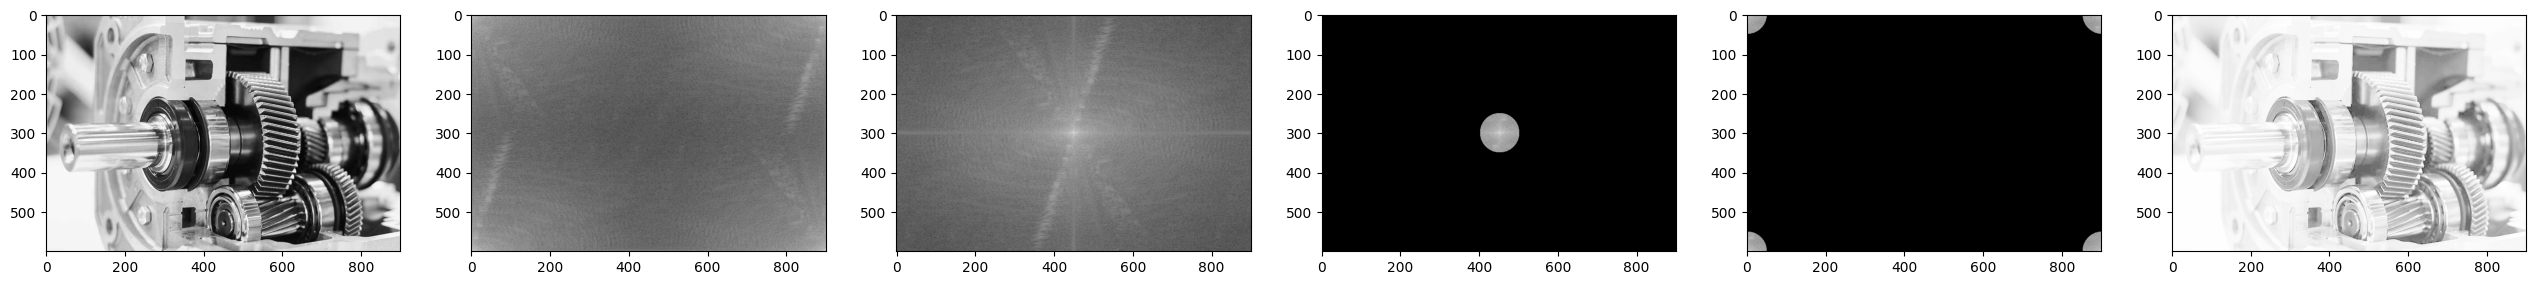

In [ ]:
fig, axes = plt.subplots(1,6, figsize=(6.4*5, 4.8*5))
axes = axes.ravel()
for i, cmp_img in enumerate([img, original, center, LowPassCenter, LowPass, inverse_LowPass]):
    if cmp_img.dtype == np.complex128:
      axes[i].imshow(np.log1p(np.abs(cmp_img)), cmap='gray')
    else:
      axes[i].imshow(cmp_img, cmap='gray')
plt.show()

## Butterworth - Low Pass Filter
D0 (cutoff frequency) = 10, n (orden) = 1

In [ ]:
def ButterworthLPF(_img,d,n):
  M,N = _img.shape
  LPF = np.zeros((M,N),dtype=np.float32)
  D0 = d
  for u in range(M):
    for v in range(N):
      D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
      LPF[u,v] = 1 / (1+(D/D0)**(2*n))
  return LPF

(-0.5, 899.5, 599.5, -0.5)

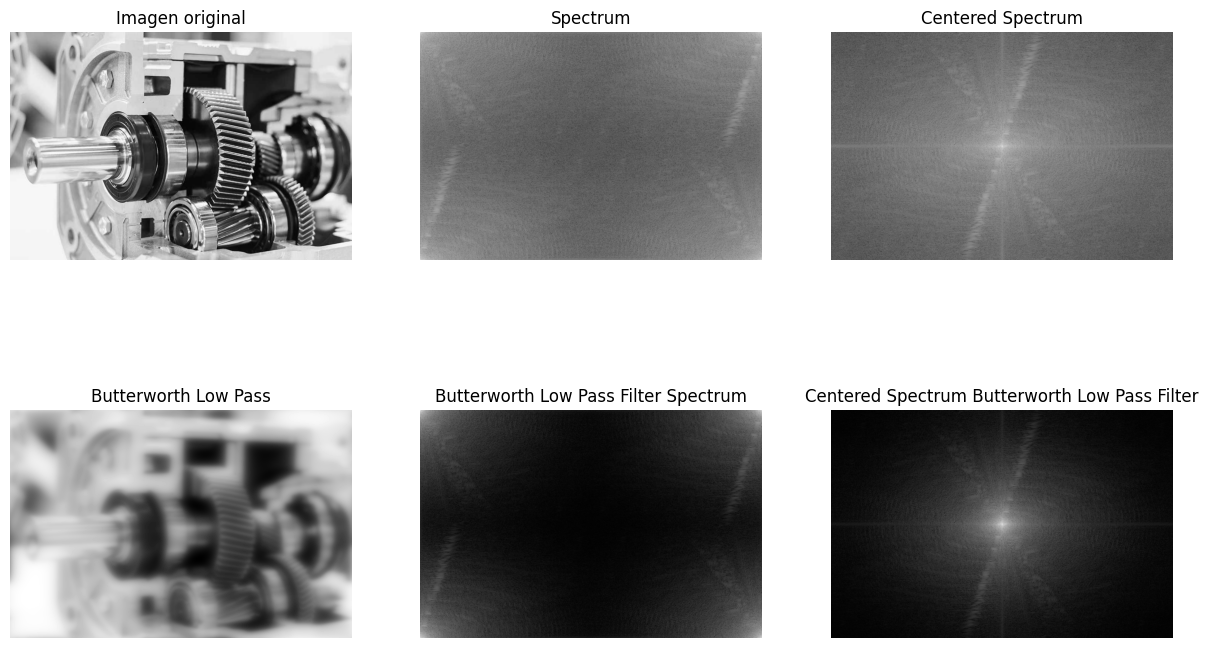

In [ ]:
fig1, ((ax10,ax11,ax12), (ax13,ax14,ax15) ) = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
ax10.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax10.set_title('Imagen original')
ax10.axis('off')

F = np.fft.fft2(img)
ax11.imshow(np.log(1+np.abs(F)),"gray")
ax11.set_title('Spectrum')
ax11.axis('off')

Fs = np.fft.fftshift(F)
ax12.imshow(np.log(1+np.abs(Fs)),"gray")
ax12.set_title('Centered Spectrum')
ax12.axis('off')


LowPassCenter = Fs * ButterworthLPF(img,10,1)
LowPass = np.fft.ifftshift(LowPassCenter)


imgRButterwortLP = np.fft.ifft2(LowPass)
ax13.imshow(np.abs(imgRButterwortLP),"gray")
ax13.set_title('Butterworth Low Pass')
ax13.axis('off')


ax14.imshow(np.log(1+np.abs(LowPass)),"gray")
ax14.set_title('Butterworth Low Pass Filter Spectrum')
ax14.axis('off')

ax15.imshow(np.log(1+np.abs(LowPassCenter)),"gray")
ax15.set_title('Centered Spectrum Butterworth Low Pass Filter')
ax15.axis('off')

(-0.5, 899.5, 599.5, -0.5)

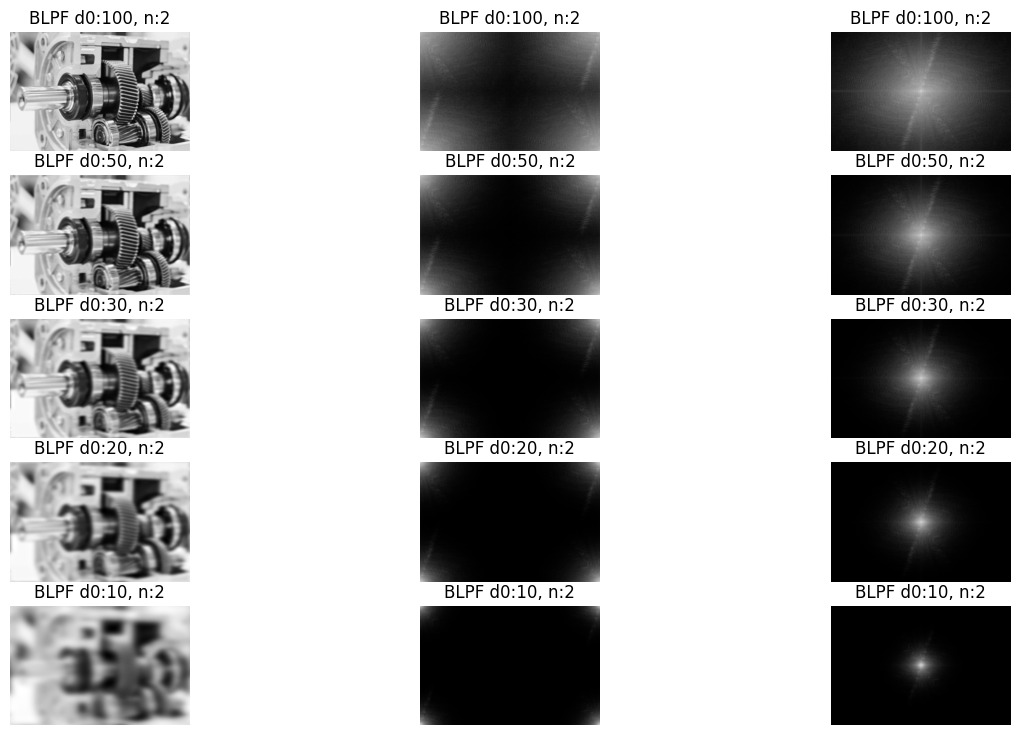

In [ ]:
fig2, ((ax20,ax21,ax22), (ax23,ax24,ax25),(ax26,ax27,ax28),(ax29,ax210,ax211),(ax212,ax213,ax214) ) = plt.subplots(nrows=5, ncols=3, figsize=(15, 9))
F = np.fft.fft2(img)
Fs = np.fft.fftshift(F)

#D0 = 100
#N = 2
d0 = 100
n = 2
LowPassCenter = Fs * ButterworthLPF(img,d0,n)
LowPass = np.fft.ifftshift(LowPassCenter)
imgRButterwortLP = np.fft.ifft2(LowPass)

ax20.imshow(np.abs(imgRButterwortLP),"gray")
ax20.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax20.axis('off')


ax21.imshow(np.log(1+np.abs(LowPass)),"gray")
ax21.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax21.axis('off')


ax22.imshow(np.log(1+np.abs(LowPassCenter)),"gray")
ax22.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax22.axis('off')


#D0 = 50
#N = 2
d0 = 50
n = 2
LowPassCenter = Fs * ButterworthLPF(img,d0,n)
LowPass = np.fft.ifftshift(LowPassCenter)
imgRButterwortLP = np.fft.ifft2(LowPass)

ax23.imshow(np.abs(imgRButterwortLP),"gray")
ax23.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax23.axis('off')


ax24.imshow(np.log(1+np.abs(LowPass)),"gray")
ax24.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax24.axis('off')


ax25.imshow(np.log(1+np.abs(LowPassCenter)),"gray")
ax25.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax25.axis('off')

#D0 = 30
#N = 2
d0 = 30
n = 2
LowPassCenter = Fs * ButterworthLPF(img,d0,n)
LowPass = np.fft.ifftshift(LowPassCenter)
imgRButterwortLP = np.fft.ifft2(LowPass)

ax26.imshow(np.abs(imgRButterwortLP),"gray")
ax26.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax26.axis('off')


ax27.imshow(np.log(1+np.abs(LowPass)),"gray")
ax27.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax27.axis('off')


ax28.imshow(np.log(1+np.abs(LowPassCenter)),"gray")
ax28.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax28.axis('off')

#D0 = 20
#N = 2
d0 = 20
n = 2
LowPassCenter = Fs * ButterworthLPF(img,d0,n)
LowPass = np.fft.ifftshift(LowPassCenter)
imgRButterwortLP = np.fft.ifft2(LowPass)

ax29.imshow(np.abs(imgRButterwortLP),"gray")
ax29.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax29.axis('off')


ax210.imshow(np.log(1+np.abs(LowPass)),"gray")
ax210.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax210.axis('off')


ax211.imshow(np.log(1+np.abs(LowPassCenter)),"gray")
ax211.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax211.axis('off')

#D0 = 10
#N = 2
d0 = 10
n = 2
LowPassCenter = Fs * ButterworthLPF(img,d0,n)
LowPass = np.fft.ifftshift(LowPassCenter)
imgRButterwortLP = np.fft.ifft2(LowPass)

ax212.imshow(np.abs(imgRButterwortLP),"gray")
ax212.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax212.axis('off')


ax213.imshow(np.log(1+np.abs(LowPass)),"gray")
ax213.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax213.axis('off')


ax214.imshow(np.log(1+np.abs(LowPassCenter)),"gray")
ax214.set_title('BLPF d0:' + str(d0) +', n:' + str(n))
ax214.axis('off')

## Gaussian - Low Pass Filter

(-0.5, 899.5, 599.5, -0.5)

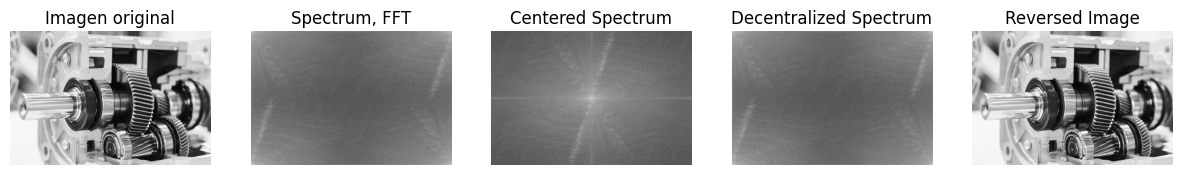

In [ ]:
fig0, ((ax0,ax1, ax2,ax3,ax4) ) = plt.subplots(nrows=1, ncols=5, figsize=(15, 9))
ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax0.set_title('Imagen original')
ax0.axis('off')

F = np.fft.fft2(img)
ax1.imshow(np.log(1+np.abs(F)),"gray")
ax1.set_title('Spectrum, FFT')
ax1.axis('off')

Fs = np.fft.fftshift(F)
ax2.imshow(np.log(1+np.abs(Fs)),"gray")
ax2.set_title('Centered Spectrum')
ax2.axis('off')

IFs = np.fft.ifftshift(Fs)
ax3.imshow(np.log(1+np.abs(IFs)),"gray")
ax3.set_title('Decentralized Spectrum')
ax3.axis('off')

imgR = np.fft.ifft2(IFs)
ax4.imshow(np.abs(imgR),"gray")
ax4.set_title('Reversed Image')
ax4.axis('off')

In [ ]:
def gaussian(image, d0=10):
    P, Q = image.shape
    U, V = np.mgrid[0:P, 0:Q]
    D = np.sqrt((U - P/2) ** 2 + (V - Q/2) ** 2)
    H = np.exp(-(D**2) / (2*(d0**2)))
    return np.multiply(image,  H)

In [ ]:
fft_img = np.fft.fft2(img)
fft_img_shift = np.fft.fftshift(fft_img)
fft_img_shift_blur = gaussian(fft_img_shift, d0=20)
fft_img_mod = np.fft.ifftshift(fft_img_shift_blur)
img_mod = np.abs(np.fft.ifft2(fft_img_mod))

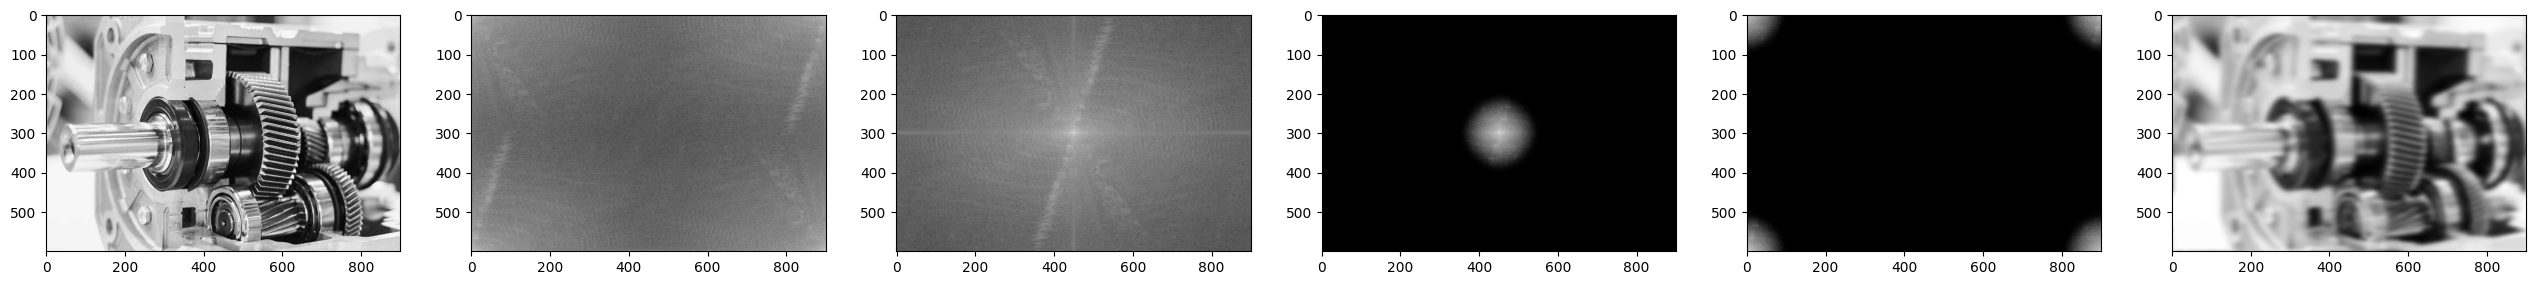

In [ ]:
fig, axes = plt.subplots(1,6, figsize=(6.4*5, 4.8*5))
axes = axes.ravel()
for i, cmp_img in enumerate([img, fft_img, fft_img_shift, fft_img_shift_blur, fft_img_mod, img_mod]):
    if cmp_img.dtype == np.complex128:
      axes[i].imshow(np.log1p(np.abs(cmp_img)), cmap='gray')
    else:
      axes[i].imshow(cmp_img, cmap='gray')
plt.show()

# **Actividad 2. Fourier filtro pasaaltas**

## Aplicación:

**Aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasaaltas**

**Aplicaciones Medicas:**
A continuación se describe el proceso de aplicación de filtro pasa altas para el estudio de una imagen de mamografía:

**Optical Fourier techniques for medical image processing and phase contrast imaging**


<img src="https://drive.google.com/uc?export=view&id=11uE8A_x-zx4fbvPFCJXw9QTnsEytAHgt" width="400"/>

El procedimiento se aplica para la investigación sistemática de imágenes de mamografía. La Fig. 4 muestra los resultados de una mamografía procesada con el filtro 1 mostrado en la Fig. 3a. La región de cambios patológicos anormales está enterrada en el fondo denso del tejido mamario como se muestra en la Fig. 4a. La Fig. 4b es la imagen procesada capturada por la cámara CCD que muestra microcalcificaciones correspondientes a la banda de frecuencia espacial alta después de eliminar el tejido mamario denso circundante que corresponde a las frecuencias espaciales bajas.


<img src="https://drive.google.com/uc?export=view&id=1ovTVG-3AxlMw5KDm-IWbN9exiEBm6-A_" width="600"/>


Sin embargo, existen algunas desventajas con la técnica de filtrado espacial simple. Cuando se cambia el objeto de la mamografía, el espectro de frecuencia espacial en el plano de Fourier será diferente debido a los cambios en la densidad y la región de interés en la mamografía. Por lo tanto, cada vez el tamaño del filtro espacial debe modificarse en consecuencia y debe colocarse con precisión en el plano de Fourier. Por lo tanto, no se trata de un procesamiento en tiempo real, ya que el filtro no es controlable de forma totalmente óptica y continua. Para superar estas dificultades, los investigadores han desarrollado varias técnicas de filtrado no lineal para la computación autoadaptable y en tiempo real. Como medio no lineal se utilizan moléculas orgánicas y biológicas, polímeros foto refractivos y cristales líquidos.

<img src="https://drive.google.com/uc?export=view&id=1IX2I1rxfFPjDHA9-7U_A_-MEERX1ona8" width="600"/>


Los resultados del procesamiento de una mamografía clínica con película de pantalla se muestran en la Fig. 12. Los componentes de alta frecuencia espacial del objeto se registran haciendo coincidir la intensidad del haz de referencia con la intensidad de la banda de alta frecuencia espacial. El proceso de grabación dura unos 5 s. Cuando el haz del objeto está bloqueado, el haz de referencia realiza la reconstrucción del holograma grabado mostrando las frecuencias espaciales cuya intensidad en el espectro de Fourier coincide con la intensidad del haz de referencia. Por lo tanto, el radiólogo puede buscar fácilmente los grupos de microcalcificaciones deseados girando la atenuadora variable que controla la intensidad del haz de referencia.

<img src="https://drive.google.com/uc?export=view&id=1OF-pmyesw6C6ZKYb6FtGN7VqHSnCMF9U" width="600"/>

Si se desea información de alta frecuencia espacial, entonces los componentes de baja frecuencia se bloquean enfocando el haz de control en el centro del espectro de Fourier. La figura 18 muestra el procesamiento de imágenes de una mamografía con película de pantalla clínica y la imagen procesada correspondiente que muestra solo microcalcificaciones, no visibles a simple vista en la mamografía original. A medida que la mamografía digital se vuelve popular, también realizamos procesamiento de imágenes de mamografías digitales. Se utiliza un modulador de luz espacial (SLM) direccionado eléctricamente para facilitar la interfaz entre la mamografía almacenada digitalmente en la computadora y la óptica utilizada en el experimento. [12]


## Ideal - High Pass Filter

In [ ]:
# Ideal

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

In [ ]:
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
HighPass = idealFilterHP(50,img.shape)
HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)

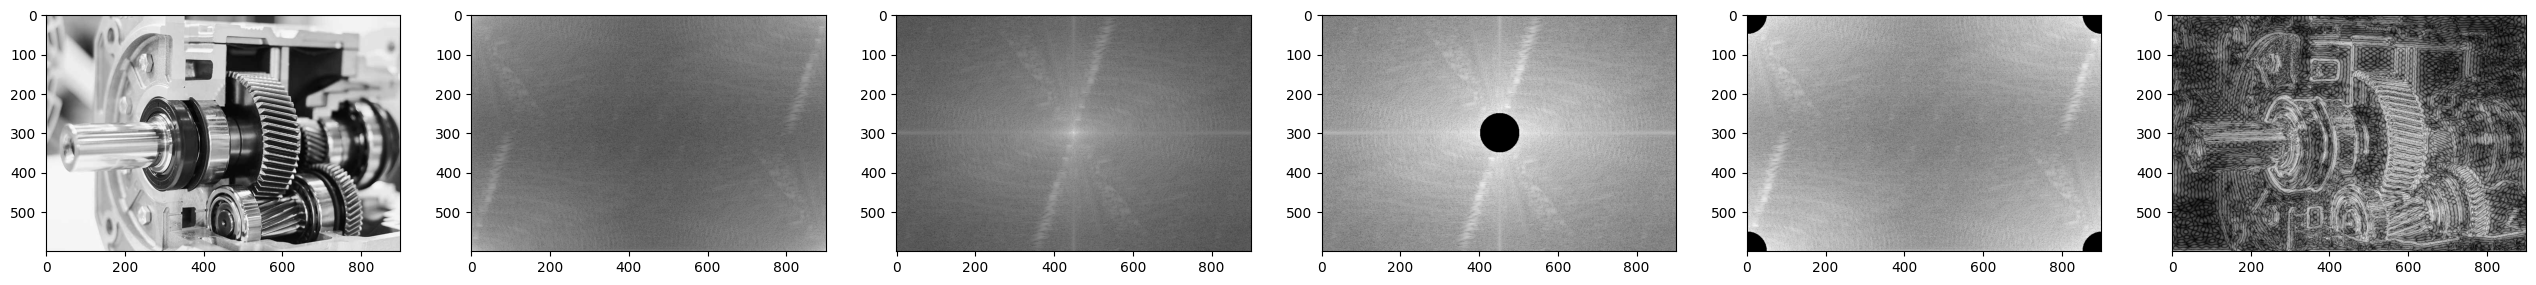

In [ ]:
fig, axes = plt.subplots(1,6, figsize=(6.4*5, 4.8*5))
axes = axes.ravel()
for i, cmp_img in enumerate([img, original, center, HighPassCenter, HighPass, inverse_HighPass]):
    if cmp_img.dtype == np.complex128:
      axes[i].imshow(np.log1p(np.abs(cmp_img)), cmap='gray')
    else:
      axes[i].imshow(cmp_img, cmap='gray')
plt.show()

## Butterwort - HighPass Filter
D0 (cutoff frequency) = 10, n (orden) = 1

In [ ]:
def ButterworthHPF(_img,d,n):
  M,N = _img.shape
  HPF = np.zeros((M,N),dtype=np.float32)
  D0 = d
  for u in range(M):
    for v in range(N):
      D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
      HPF[u,v] = 1 / (1+(D0/D)**(2*n))
  return HPF

<ipython-input-17-2f9fb16c24c8>:8: RuntimeWarning: divide by zero encountered in double_scalars
  HPF[u,v] = 1 / (1+(D0/D)**(2*n))


(-0.5, 899.5, 599.5, -0.5)

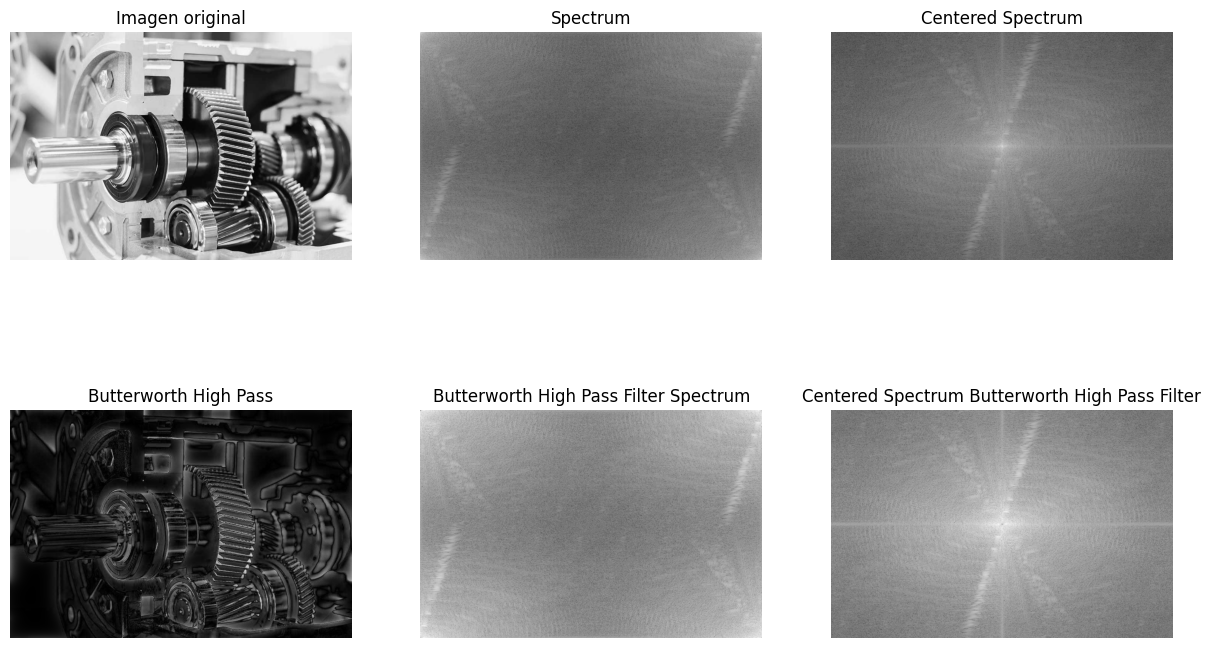

In [ ]:
fig1, ((ax10,ax11,ax12), (ax13,ax14,ax15) ) = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
ax10.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax10.set_title('Imagen original')
ax10.axis('off')

F = np.fft.fft2(img)
ax11.imshow(np.log(1+np.abs(F)),"gray")
ax11.set_title('Spectrum')
ax11.axis('off')

Fs = np.fft.fftshift(F)
ax12.imshow(np.log(1+np.abs(Fs)),"gray")
ax12.set_title('Centered Spectrum')
ax12.axis('off')


HighPassCenter = Fs * ButterworthHPF(img,10,1)
HighPass = np.fft.ifftshift(HighPassCenter)
imgR = np.fft.ifft2(IFs)

imgRButterwortHP = np.fft.ifft2(HighPass)
ax13.imshow(np.abs(imgRButterwortHP),"gray")
ax13.set_title('Butterworth High Pass')
ax13.axis('off')


ax14.imshow(np.log(1+np.abs(HighPass)),"gray")
ax14.set_title('Butterworth High Pass Filter Spectrum')
ax14.axis('off')

ax15.imshow(np.log(1+np.abs(HighPassCenter)),"gray")
ax15.set_title('Centered Spectrum Butterworth High Pass Filter')
ax15.axis('off')

<ipython-input-17-2f9fb16c24c8>:8: RuntimeWarning: divide by zero encountered in double_scalars
  HPF[u,v] = 1 / (1+(D0/D)**(2*n))


(-0.5, 899.5, 599.5, -0.5)

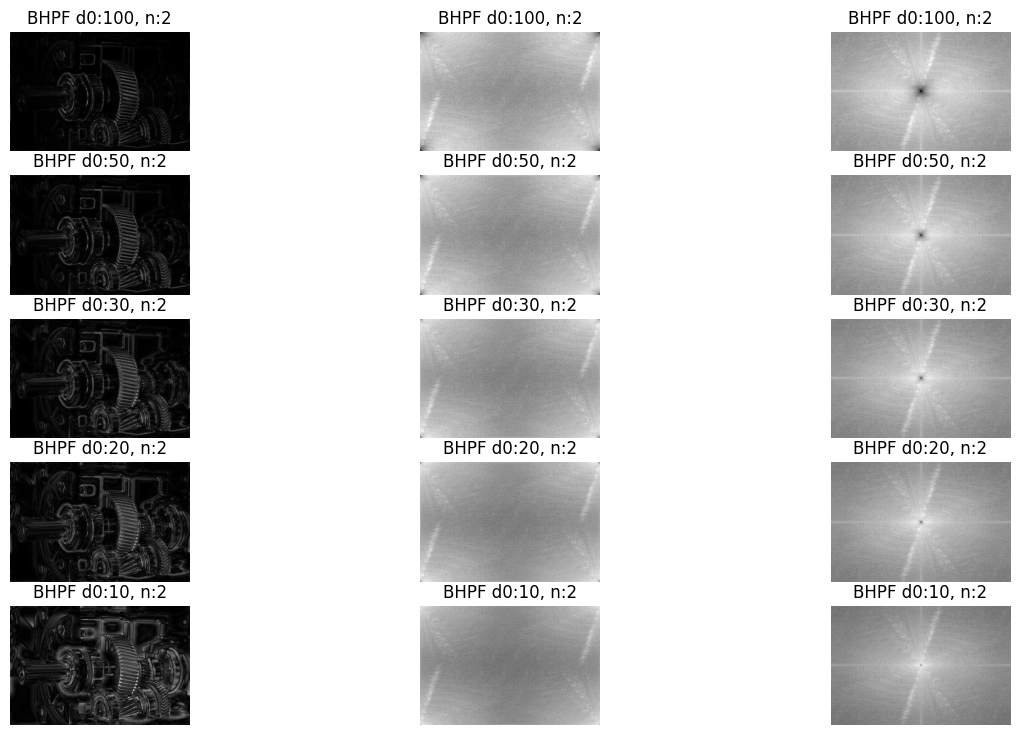

In [ ]:
fig2, ((ax20,ax21,ax22), (ax23,ax24,ax25),(ax26,ax27,ax28),(ax29,ax210,ax211),(ax212,ax213,ax214) ) = plt.subplots(nrows=5, ncols=3, figsize=(15, 9))
F = np.fft.fft2(img)
Fs = np.fft.fftshift(F)

#D0 = 100
#N = 2
d0 = 100
n = 2
HighPassCenter = Fs * ButterworthHPF(img,d0,n)
HighPass = np.fft.ifftshift(HighPassCenter)
imgRButterwortHP = np.fft.ifft2(HighPass)

ax20.imshow(np.abs(imgRButterwortHP),"gray")
ax20.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax20.axis('off')


ax21.imshow(np.log(1+np.abs(HighPass)),"gray")
ax21.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax21.axis('off')


ax22.imshow(np.log(1+np.abs(HighPassCenter)),"gray")
ax22.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax22.axis('off')


#D0 = 50
#N = 2
d0 = 50
n = 2
HighPassCenter = Fs * ButterworthHPF(img,d0,n)
HighPass = np.fft.ifftshift(HighPassCenter)
imgRButterwortHP = np.fft.ifft2(HighPass)

ax23.imshow(np.abs(imgRButterwortHP),"gray")
ax23.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax23.axis('off')


ax24.imshow(np.log(1+np.abs(HighPass)),"gray")
ax24.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax24.axis('off')


ax25.imshow(np.log(1+np.abs(HighPassCenter)),"gray")
ax25.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax25.axis('off')

#D0 = 30
#N = 2
d0 = 30
n = 2
HighPassCenter = Fs * ButterworthHPF(img,d0,n)
HighPass = np.fft.ifftshift(HighPassCenter)
imgRButterwortHP = np.fft.ifft2(HighPass)

ax26.imshow(np.abs(imgRButterwortHP),"gray")
ax26.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax26.axis('off')


ax27.imshow(np.log(1+np.abs(HighPass)),"gray")
ax27.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax27.axis('off')


ax28.imshow(np.log(1+np.abs(HighPassCenter)),"gray")
ax28.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax28.axis('off')

#D0 = 20
#N = 2
d0 = 20
n = 2
HighPassCenter = Fs * ButterworthHPF(img,d0,n)
HighPass = np.fft.ifftshift(HighPassCenter)
imgRButterwortHP = np.fft.ifft2(HighPass)

ax29.imshow(np.abs(imgRButterwortHP),"gray")
ax29.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax29.axis('off')


ax210.imshow(np.log(1+np.abs(HighPass)),"gray")
ax210.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax210.axis('off')


ax211.imshow(np.log(1+np.abs(HighPassCenter)),"gray")
ax211.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax211.axis('off')

#D0 = 10
#N = 2
d0 = 10
n = 2
HighPassCenter = Fs * ButterworthHPF(img,d0,n)
HighPass = np.fft.ifftshift(HighPassCenter)
imgRButterwortHP = np.fft.ifft2(HighPass)

ax212.imshow(np.abs(imgRButterwortHP),"gray")
ax212.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax212.axis('off')


ax213.imshow(np.log(1+np.abs(HighPass)),"gray")
ax213.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax213.axis('off')


ax214.imshow(np.log(1+np.abs(HighPassCenter)),"gray")
ax214.set_title('BHPF d0:' + str(d0) +', n:' + str(n))
ax214.axis('off')

## Gaussian High Pass Filter

In [ ]:
def invgaussian(image, d0=10):
    P, Q = image.shape
    U, V = np.mgrid[0:P, 0:Q]
    D = np.sqrt((U - P/2) ** 2 + (V - Q/2) ** 2)
    H = np.exp(-(D**2) / (2*(d0**2)))
    return np.multiply(image, 1 - H)

In [ ]:
fft_img = np.fft.fft2(img)
fft_img_shift = np.fft.fftshift(fft_img)
fft_img_shift_inv = invgaussian(fft_img_shift)
fft_img_mod = np.fft.ifftshift(fft_img_shift_inv)
img_mod = np.abs(np.fft.ifft2(fft_img_mod))

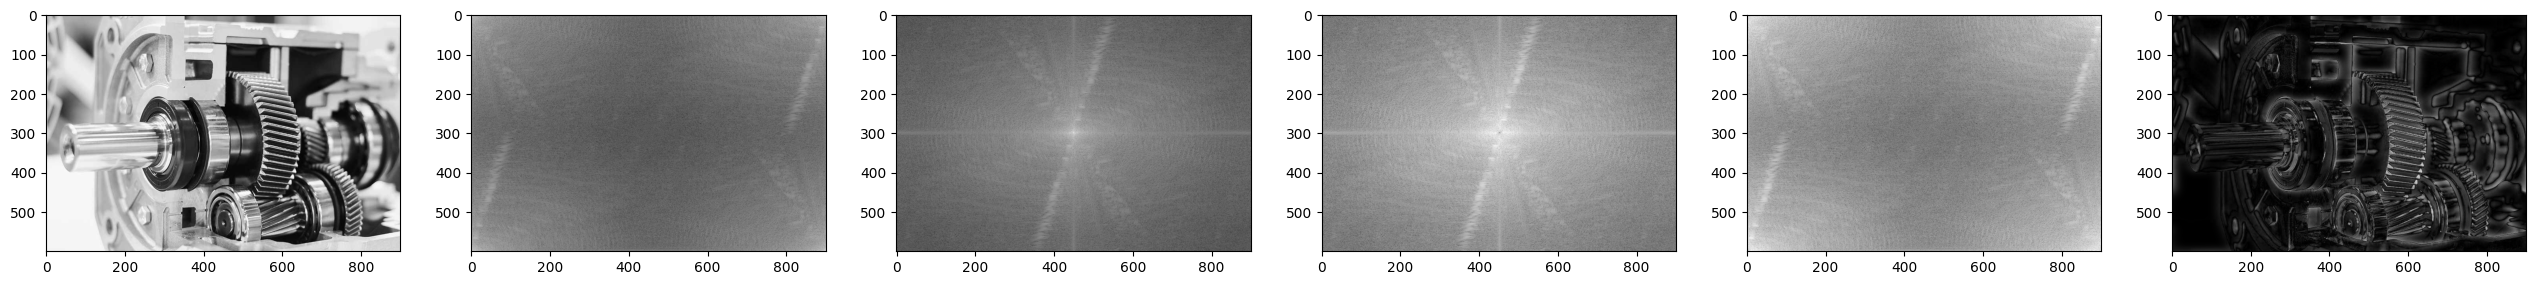

In [ ]:
fig, axes = plt.subplots(1,6, figsize=(6.4*5, 4.8*5))
axes = axes.ravel()
for i, cmp_img in enumerate([img, fft_img, fft_img_shift, fft_img_shift_inv, fft_img_mod, img_mod]):
    if cmp_img.dtype == np.complex128:
      axes[i].imshow(np.log1p(np.abs(cmp_img)), cmap='gray')
    else:
      axes[i].imshow(cmp_img, cmap='gray')
plt.show()

# **Bibliografia**

[1] Gonzalez, R. C., & Woods, R. E. (2017). Digital Image Processing, Global Edition. Pearson Higher Education.

[2] Ren, J., & Liu, X. (2015). On vectorization of deep convolutional neural networks for vision tasks. Proceedings of the . . . AAAI Conference on Artificial Intelligence, 29(1). https://doi.org/10.1609/aaai.v29i1.9488

[3] Tipos de operaciones morfológicas (nd). Recuperado febrero 3, 2024, de https://la.mathworks.com/help/images/morphological-dilation-and-erosion.html

[4] Closing (nd). Recuperado febrero 3, 2024, de https://homepages.inf.ed.ac.uk/rbf/HIPR2/close.htm

[5] Morphological Transformations (nd). Recuperado febrero 3, 2024, de https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

[6]Image Processing: Morphological Operations with Python, Recuperado febrero 3, 2024, de https://pub.towardsai.net/image-processing-morphological-operations-with-python-7e0f8d1983eb

[7]Apply Morphological Gradient Operation to an Image using OpenCV, Recuperado febrero 3, 2024, de https://lindevs.com/apply-morphological-gradient-operation-to-an-image-using-opencv

[8]Morphological Transformations of Images using OpenCV | Image Processing Part-2, Recuperado febrero 3, 2024, de https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38

[9]Morphological Transformations, Recuperado febrero 3, 2024, de https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

[10]Fingerprint Image Enhancement using
Filtering Techniques, (Greenberg, Shlomo. Aladjem, Mayer. Kogan, Daniel), Elsevier Ltd, Recuperado febrero 3, 2024, http://0-search-ebscohost-com.biblioteca-ils.tec.mx/login.aspx%3fdirect%3dtrue%26db%3dedselp%26AN%3dS1077201401902839%26lang%3des%26site%3deds-live%26scope%3dsite

[11] Image-Range Stitching and Semantic-Based Crack Detection Methods for Tunnel Inspection Vehicle, (Tian, L., Li, Q., He, L., & Zhang, D.), (2023). Remote Sensing, 15(21), 5158. Recuperado febrero 3, 2024, de https://0-doi-org.biblioteca-ils.tec.mx/10.3390/rs15215158

[12] Yelleswarapu, C. S., Kothapalli, S.-R., & Rao, D. V. G. L. N. (2008). Optical Fourier techniques for medical image processing and phase contrast imaging. Optics Communications, 281(7), 1876–1888. https://0-doi-org.biblioteca-ils.tec.mx/10.1016/j.optcom.2007.05.072